In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget


import pyspedas
from pyspedas import tplot, options, get_data
from data_class import LoadArtemis, plot_electron_spectrogram

import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))
from Training.data_loader import MagnetotailDataset
from Helper.silence import silence_all
from tqdm import tqdm

# Create the CDAWeb interface object
cdaweb_obj = pyspedas.CDAWeb()

In [2]:
import pandas as pd

# Read the Excel file and extract the first sheet with last 4 columns
df = pd.read_excel('ART_Xing_times_pos.xlsx', sheet_name=0)
df = df.iloc[:, -7:-1]  # Keep only the last 4 columns (last one is bugged so it is written with -5 to -1)

**TEST DATA**

In [3]:
test_time_start = '2013-04-23 12:00:00'
test_time_end   = '2013-04-28 20:00:00'

In [ ]:
with silence_all():
        curr_data_class = LoadArtemis(start_time = test_time_start, 
                                    end_time   = test_time_end,
                                    exclude_data_types=['eflux'] # Exclude all spectrogram data from extraction
                                    )

        curr_data_class.convert_min_delta_all(start_time        = test_time_start,
                                                end_time          = test_time_end,
                                                dt_method         ='max', 
                                                custom_time_delta = 60)

        curr_data_class.extract_to_HDF5('testing_data/artemis_P1_statistical_test_v2.h5')

ConnectionError: HTTPSConnectionPool(host='cdaweb.gsfc.nasa.gov', port=443): Max retries exceeded with url: /WS/cdasr/1/dataviews/sp_phys/datasets?observatoryGroup=ARTEMIS&instrumentType=Particles%20%28space%29&instrumentType=Electric%20Fields%20%28space%29&instrumentType=Magnetic%20Fields%20%28space%29 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000028ACC156180>: Failed to resolve 'cdaweb.gsfc.nasa.gov' ([Errno 11002] getaddrinfo failed)"))

**TRAINING DATA**

In [4]:
# Extracting first and last entries and first and last exits from the DataFrame
first_entries = df[df['first_entry'] == True]
last_exits    = df[df['last_exit']   == True]


# Convert the 'coupled time' column to a list for both last entries and first exits
first_entries_times = first_entries['coupled time'].tolist()
last_exits_times = last_exits['coupled time'].tolist()


In [5]:

first_entries_times = [time - pd.Timedelta(minutes=720) for time in first_entries_times]
last_exits_times    = [time + pd.Timedelta(minutes=720) for time in last_exits_times]

first_entries_times_str = [time.strftime('%Y-%m-%d %H:%M:%S') for time in first_entries_times]
last_exits_times_str    = [time.strftime('%Y-%m-%d %H:%M:%S') for time in last_exits_times]



NameError: name 'first_entries_times' is not defined

In [11]:
# Add all magnetosheath data to the HDF5 file

# Add magnetosheath parts from before magnetotail entries
for i in tqdm(range(20, len(first_entries_times_str))):

    with silence_all():
        curr_data_class = LoadArtemis(start_time = first_entries_times_str[i], 
                                     end_time   = last_exits_times_str[i],
                                    )

        curr_data_class.convert_min_delta_all(start_time        = first_entries_times_str[i],
                                            end_time          = last_exits_times_str[i],
                                            dt_method         ='max', 
                                            custom_time_delta = 120)

        curr_data_class.extract_to_HDF5('testing_data/artemis_P1_v2_high_sampling_test.h5')

    


100%|██████████| 5/5 [04:03<00:00, 48.79s/it]


In [ ]:

# Add magnetosheath parts from after magnetotail exits
for i in range(len(last_exits_times_start_str)):
    print(f"Start magnetosheath region: {last_exits_times_start_str[i]}, End magnetosheath region: {last_exits_times_end_str[i]}")

    with silence_all():
        curr_data_class = LoadArtemis(start_time = last_exits_times_start_str[i], 
                                    end_time   = last_exits_times_end_str[i]
                                    )

        curr_data_class.convert_min_delta_all(start_time        = last_exits_times_start_str[i],
                                            end_time          = last_exits_times_end_str[i],
                                            dt_method         ='max', 
                                            custom_time_delta = 600)

        curr_data_class.extract_to_HDF5('training_data/artemis_P1_v2.h5')

Start magnetosheath region: 2011-08-15 22:50:00, End magnetosheath region: 2011-08-16 21:20:00
Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0024 saved with data from 2011-08-15T22:50:00.000000000 to 2011-08-16T21:20:00.000000000
Start magnetosheath region: 2011-09-14 15:30:00, End magnetosheath region: 2011-09-15 14:00:00
Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0025 saved with data from 2011-09-14T15:30:00.000000000 to 2011-09-15T14:00:00.000000000
Start magnetosheath region: 2011-10-14 06:30:00, End magnetosheath region: 2011-10-15 05:00:00
Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0026 saved with data from 2011-10-14T06:30:00.000000000 to 2011-10-15T05:01:10.694923776
Session session_0027 saved with data from 2011-10-15T13:13:58.747196416 to 2011-10-15T05:00:00.000000000
Start magnetosheath region: 2011-11-13 05:20:00, End magne

Last entry time: 2011-08-11 11:10:00, First exit time: 2011-08-14 22:50:00


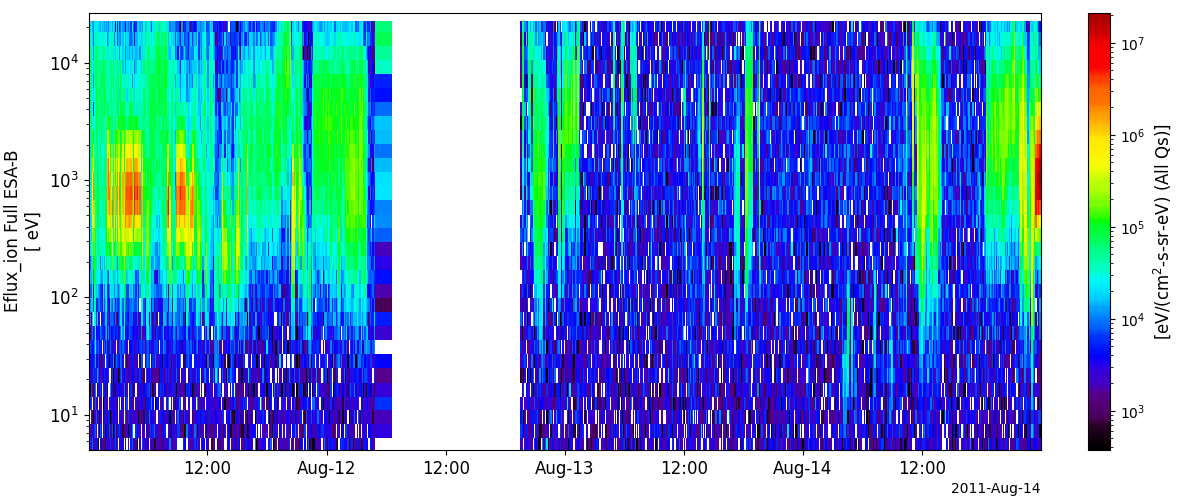

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0051 saved with data from 2011-08-11T11:10:00.000000000 to 2011-08-12T04:55:06.847534592
Session session_0052 saved with data from 2011-08-12T19:34:10.153708544 to 2011-08-14T22:50:00.000000000
Last entry time: 2011-09-10 17:00:00, First exit time: 2011-09-14 13:30:00


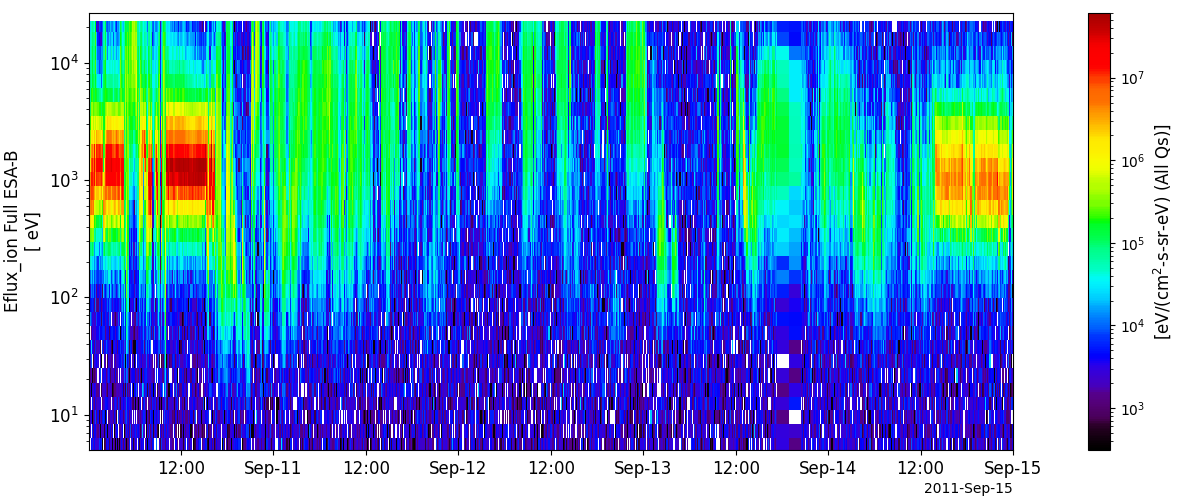

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0053 saved with data from 2011-09-10T17:00:00.000000000 to 2011-09-13T17:22:22.570996992
Session session_0054 saved with data from 2011-09-13T20:24:52.494883072 to 2011-09-14T13:30:00.000000000
Last entry time: 2011-11-08 12:00:00, First exit time: 2011-11-13 03:20:00


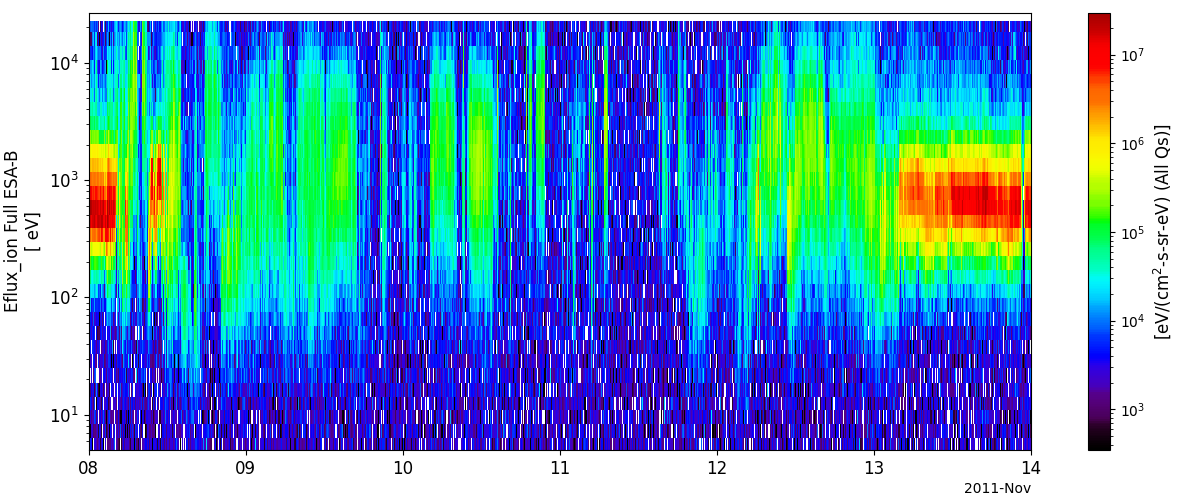

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0055 saved with data from 2011-11-08T12:00:00.000000000 to 2011-11-13T03:20:00.000000000
Last entry time: 2011-12-08 03:20:00, First exit time: 2011-12-11 20:00:00


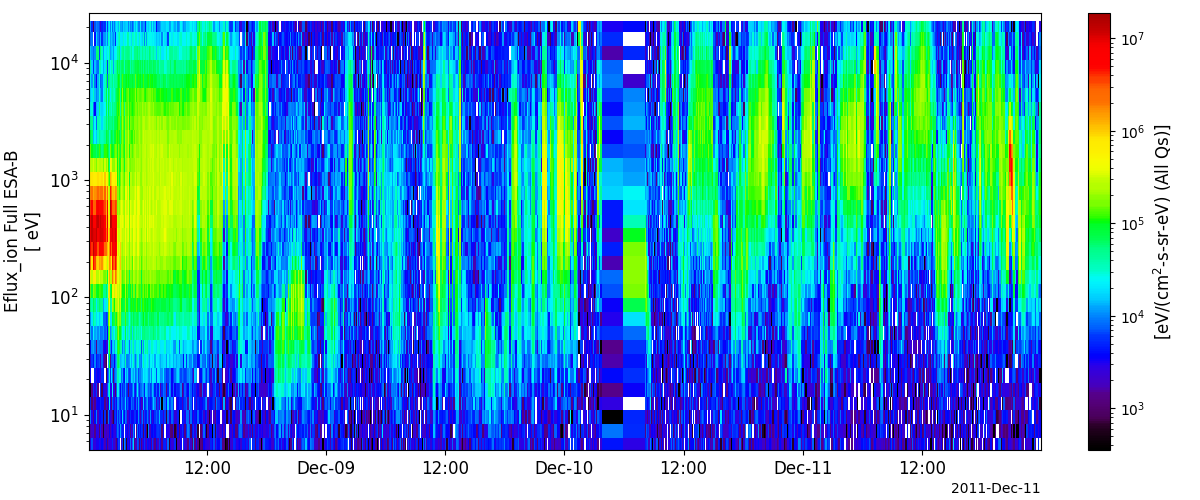

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0056 saved with data from 2011-12-08T03:20:00.000000000 to 2011-12-10T03:48:40.964445696
Session session_0057 saved with data from 2011-12-10T08:03:10.373347840 to 2011-12-11T20:00:00.000000000
Last entry time: 2012-01-07 03:40:00, First exit time: 2012-01-10 19:30:00


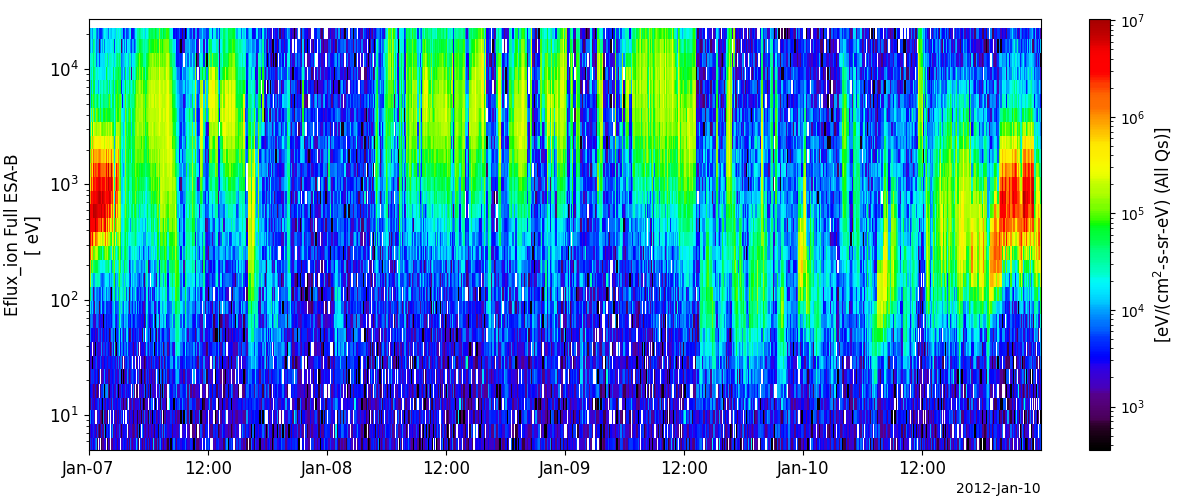

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0058 saved with data from 2012-01-07T03:40:00.000000000 to 2012-01-10T19:30:00.000000000
Last entry time: 2012-02-05 23:40:00, First exit time: 2012-02-09 11:40:00


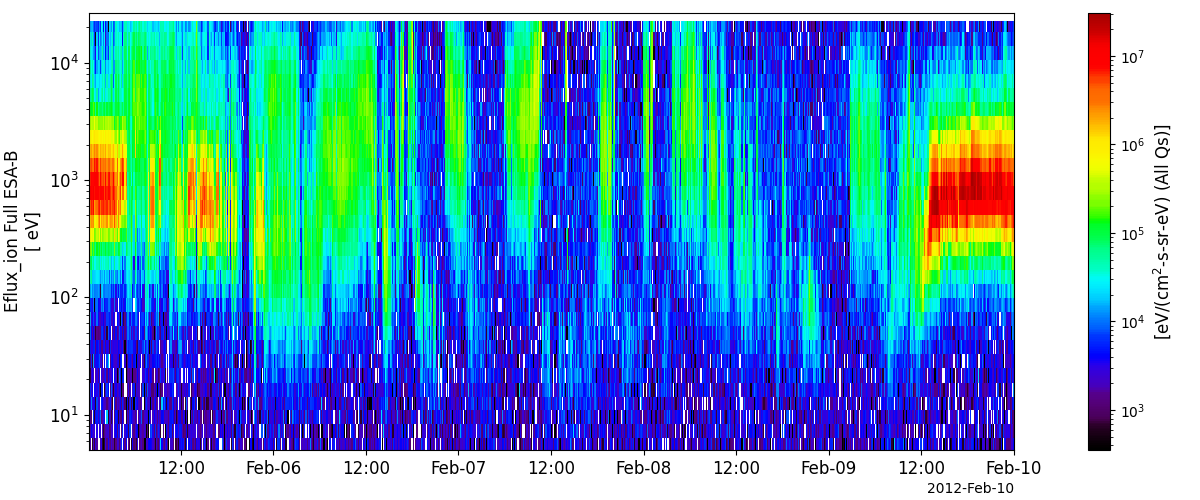

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0059 saved with data from 2012-02-05T23:40:00.000000000 to 2012-02-09T11:40:00.000000000
Last entry time: 2012-03-06 17:10:00, First exit time: 2012-03-10 00:10:00


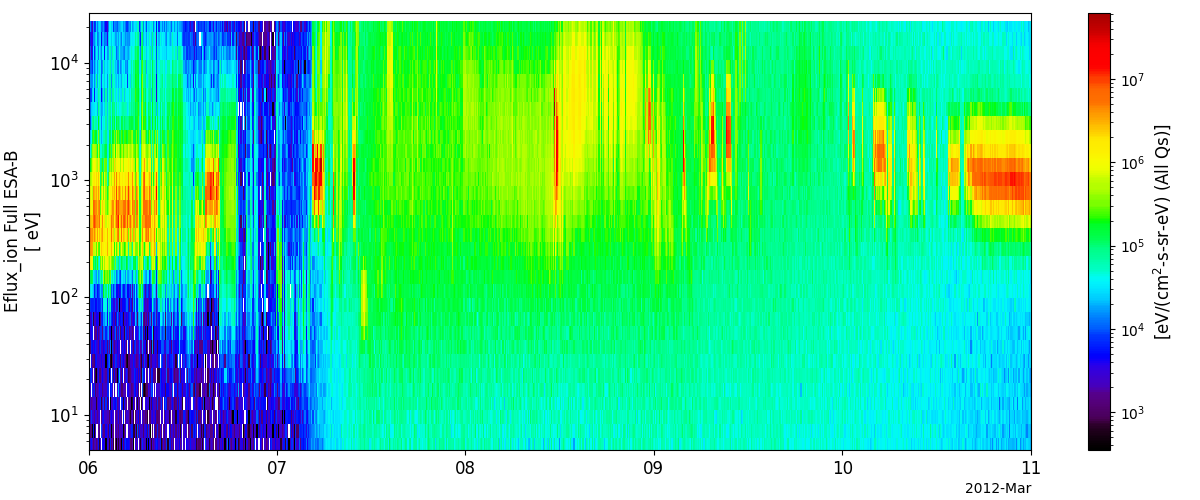

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0060 saved with data from 2012-03-06T17:10:00.000000000 to 2012-03-10T00:10:00.000000000
Last entry time: 2012-04-05 01:40:00, First exit time: 2012-04-08 03:00:00


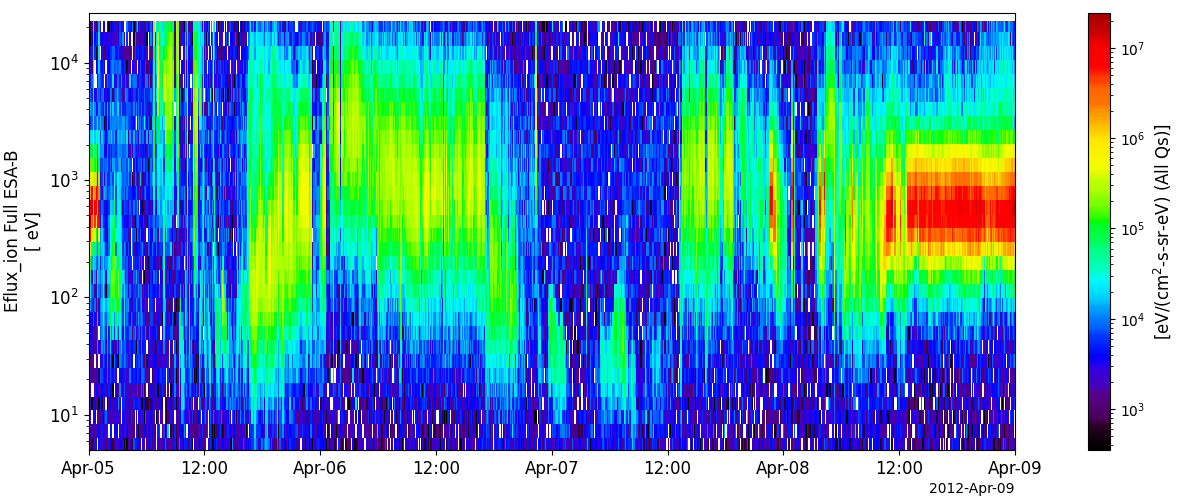

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0061 saved with data from 2012-04-05T01:40:00.000000000 to 2012-04-08T03:00:00.000000000
Last entry time: 2012-05-04 05:50:00, First exit time: 2012-05-07 08:30:00


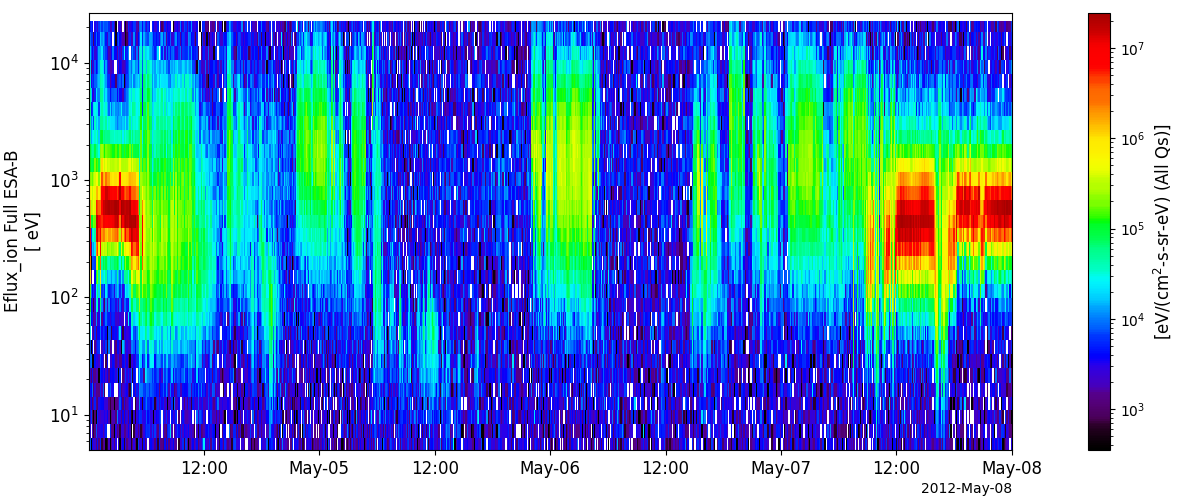

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0062 saved with data from 2012-05-04T05:50:00.000000000 to 2012-05-07T08:30:00.000000000
Last entry time: 2012-06-02 15:35:00, First exit time: 2012-06-06 06:50:00


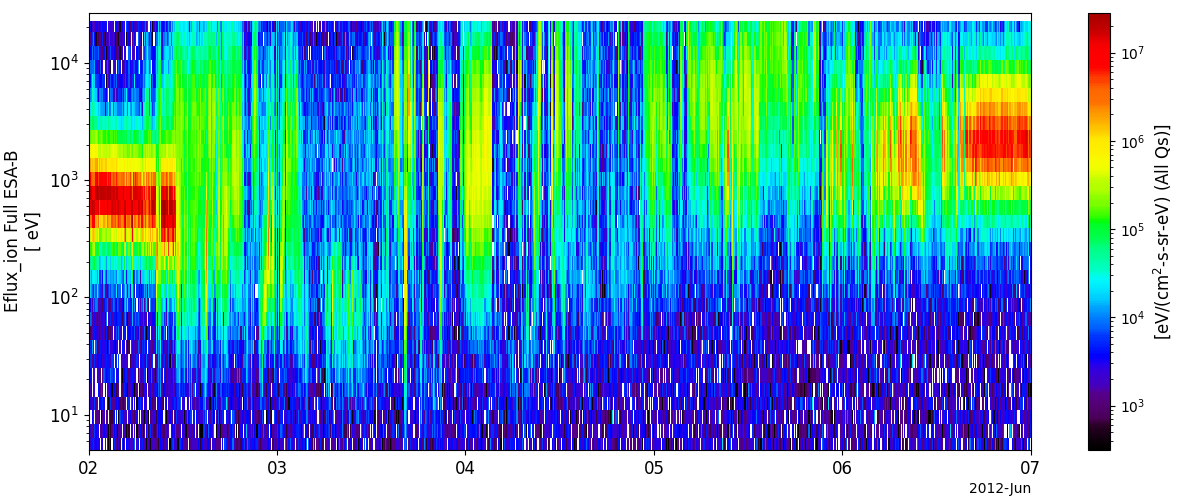

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0063 saved with data from 2012-06-02T15:35:00.000000000 to 2012-06-06T06:50:00.000000000
Last entry time: 2012-07-02 02:00:00, First exit time: 2012-07-05 07:40:00


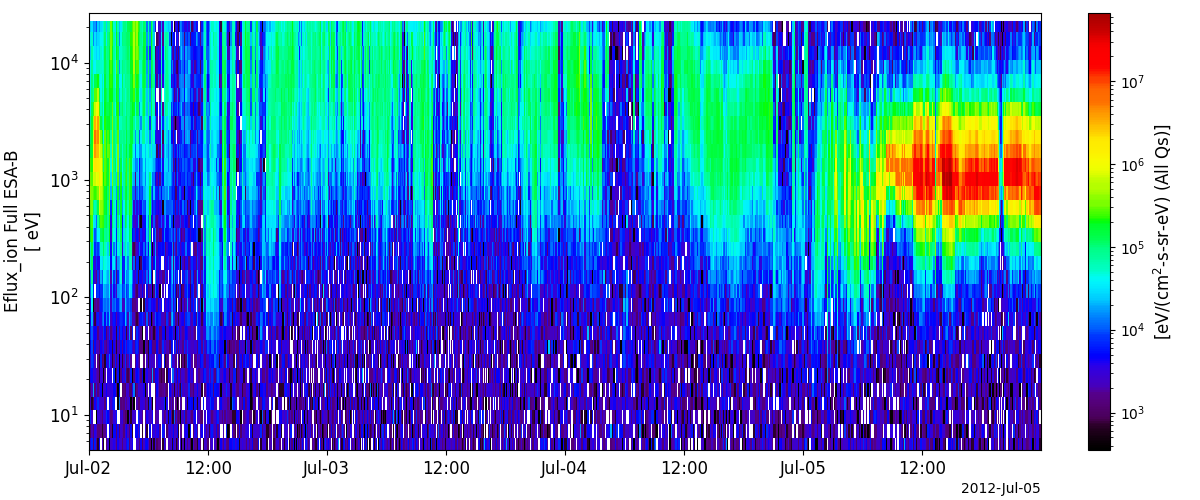

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0064 saved with data from 2012-07-02T02:00:00.000000000 to 2012-07-05T07:40:00.000000000
Last entry time: 2012-07-30 19:30:00, First exit time: 2012-08-03 15:40:00


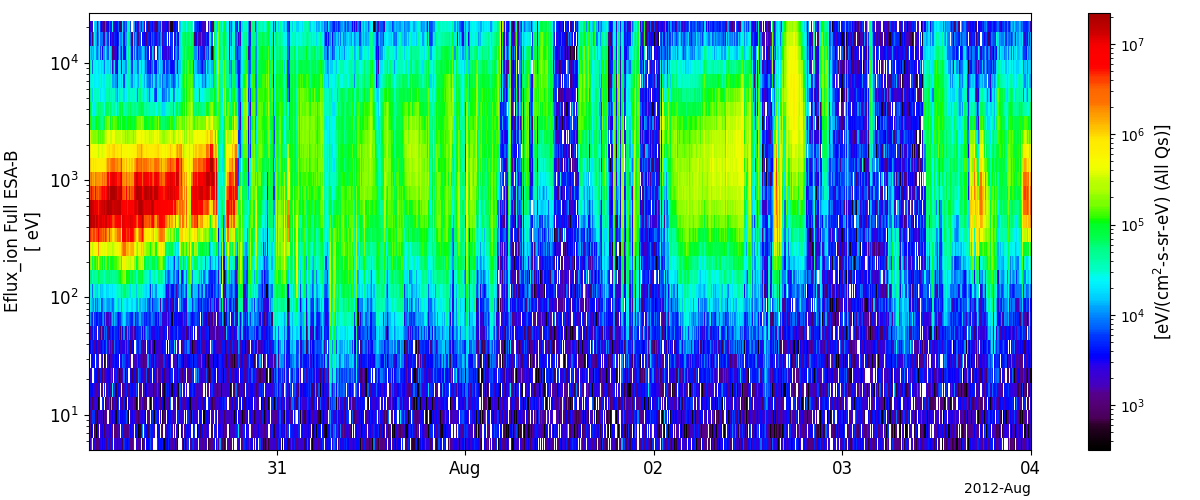

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0065 saved with data from 2012-07-30T19:30:00.000000000 to 2012-08-03T15:40:00.000000000
Last entry time: 2012-08-29 01:10:00, First exit time: 2012-09-01 17:40:00


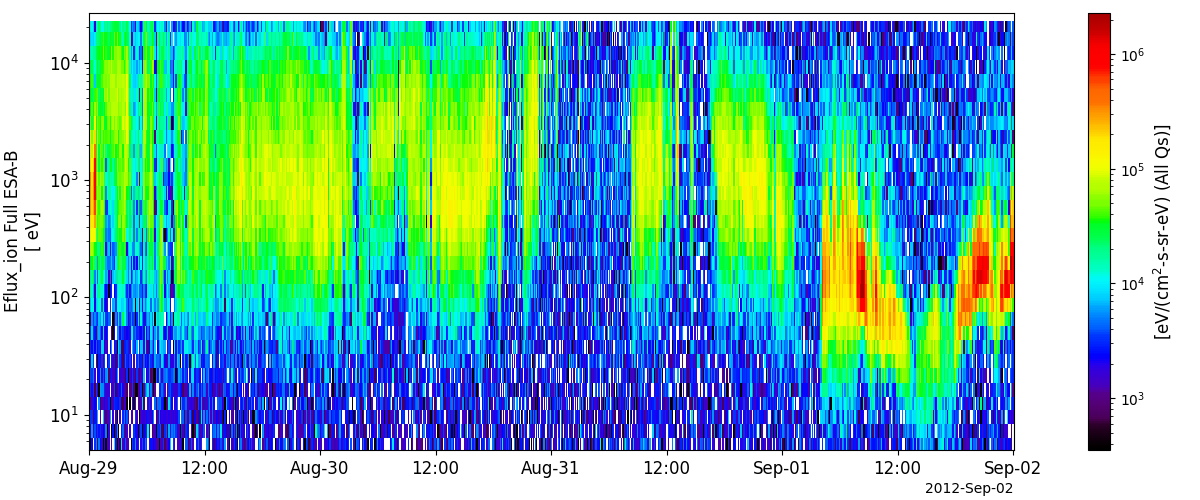

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0066 saved with data from 2012-08-29T01:10:00.000000000 to 2012-09-01T17:40:00.000000000
Last entry time: 2012-09-27 07:20:00, First exit time: 2012-09-30 22:50:00


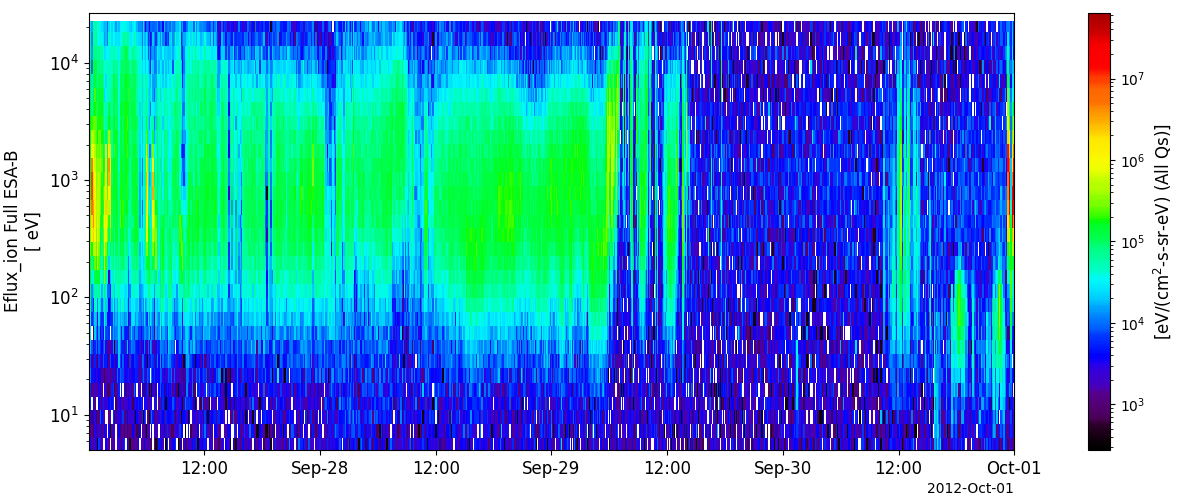

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0067 saved with data from 2012-09-27T07:20:00.000000000 to 2012-09-30T22:50:00.000000000
Last entry time: 2012-10-27 14:15:00, First exit time: 2012-10-30 21:45:00


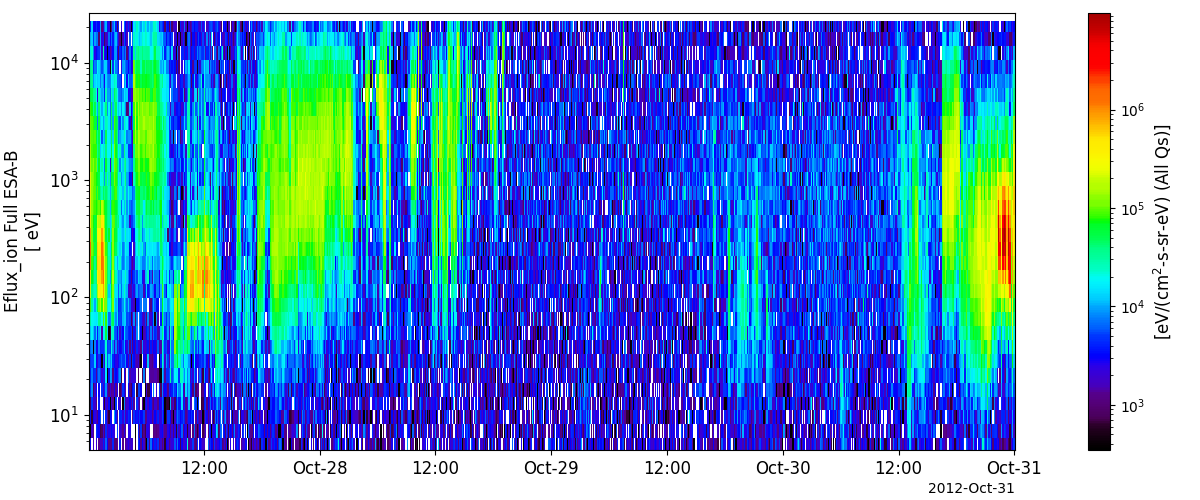

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0068 saved with data from 2012-10-27T14:15:00.000000000 to 2012-10-30T21:45:00.000000000
Last entry time: 2012-11-26 14:30:00, First exit time: 2012-11-30 10:50:00


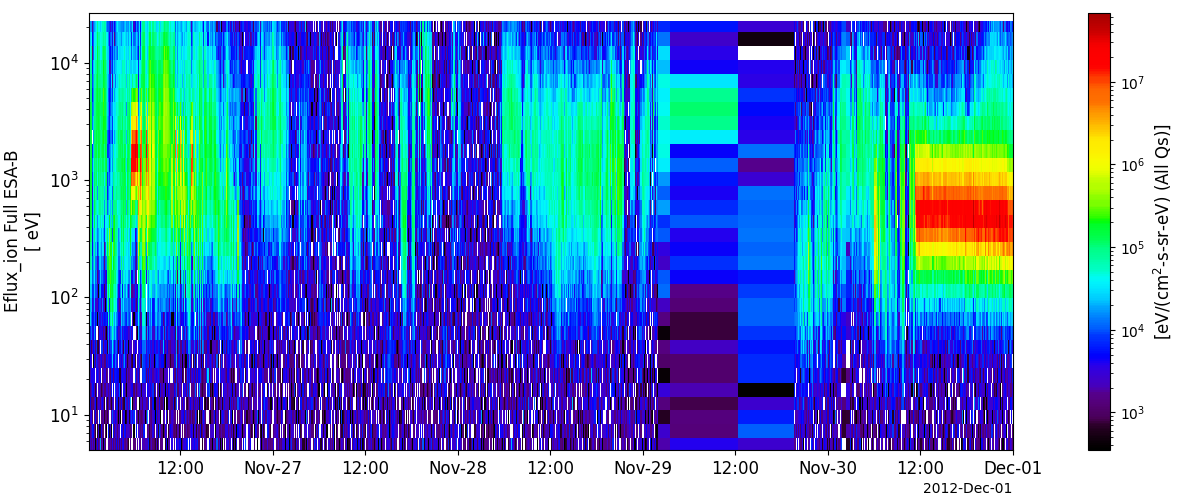

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0069 saved with data from 2012-11-26T14:30:00.000000000 to 2012-11-29T01:58:02.343000832
Session session_0070 saved with data from 2012-11-29T05:05:26.467952896 to 2012-11-29T05:05:26.467952896
Session session_0071 saved with data from 2012-11-29T19:34:47.158714880 to 2012-11-30T01:54:06.293377792
Session session_0072 saved with data from 2012-11-30T02:46:28.676579328 to 2012-11-30T10:50:00.000000000
Last entry time: 2012-12-26 01:45:00, First exit time: 2012-12-29 11:30:00


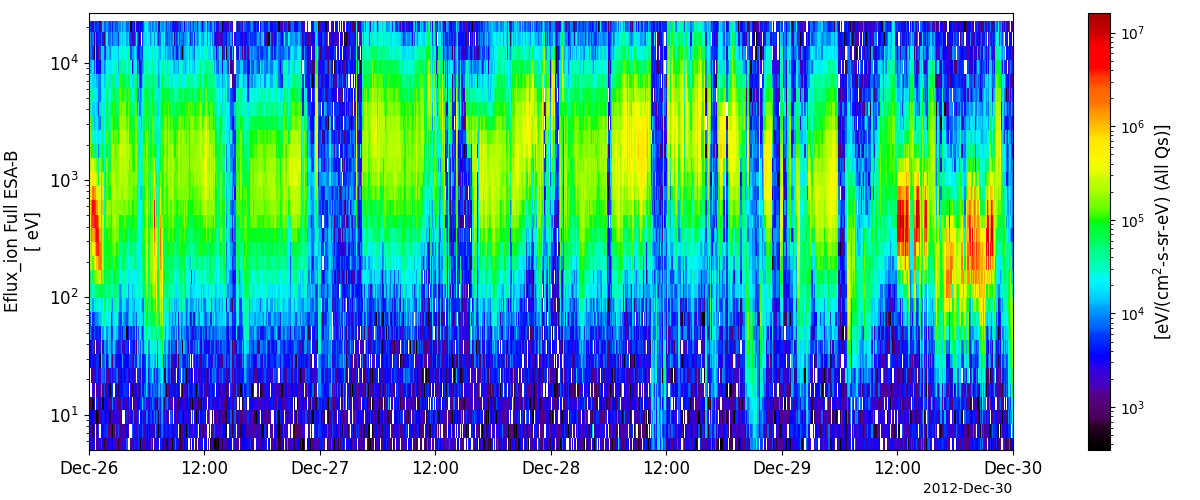

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0073 saved with data from 2012-12-26T01:45:00.000000000 to 2012-12-29T11:30:00.000000000
Last entry time: 2013-01-26 00:10:00, First exit time: 2013-01-29 07:30:00


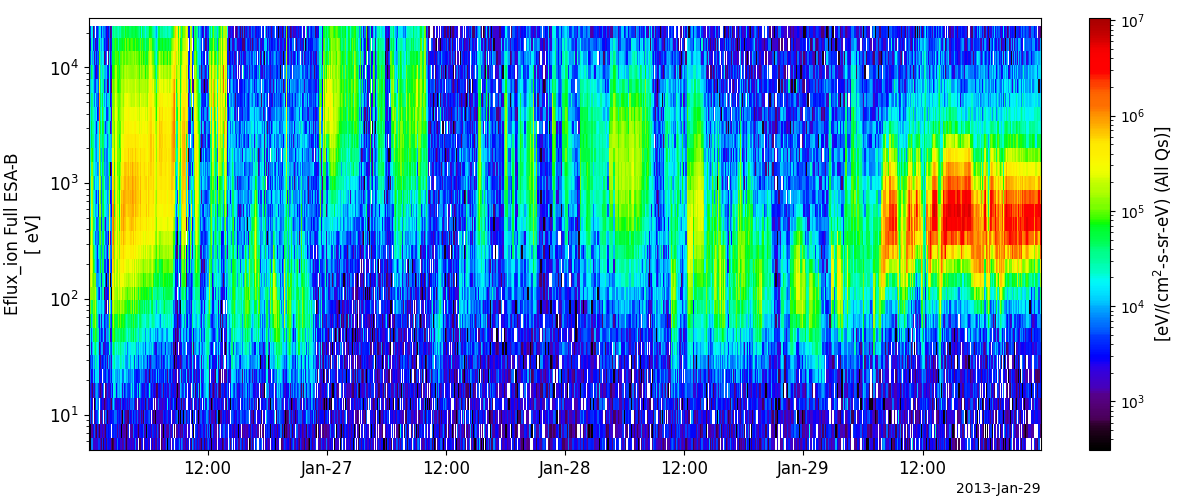

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0074 saved with data from 2013-01-26T00:10:00.000000000 to 2013-01-29T07:30:00.000000000
Last entry time: 2013-02-23 16:30:00, First exit time: 2013-02-27 07:05:00


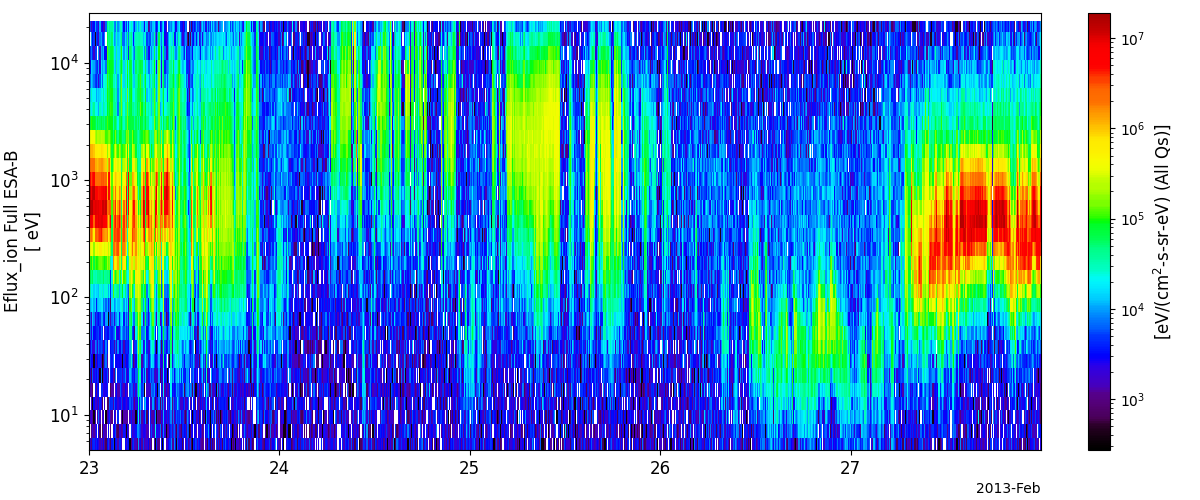

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0075 saved with data from 2013-02-23T16:30:00.000000000 to 2013-02-27T07:05:00.000000000
Last entry time: 2013-03-25 20:55:00, First exit time: 2013-03-28 23:50:00


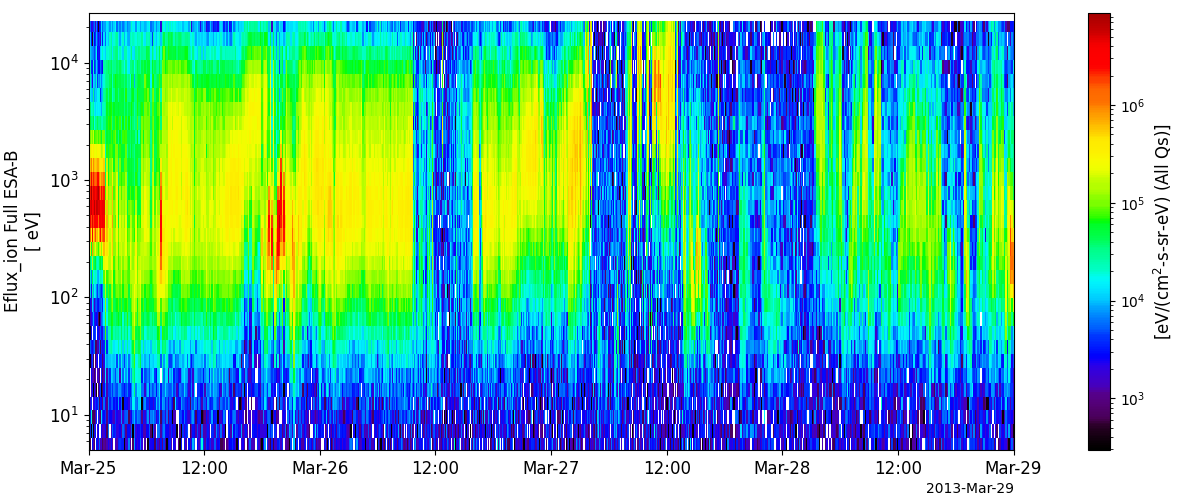

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0076 saved with data from 2013-03-25T20:55:00.000000000 to 2013-03-28T23:50:00.000000000
Last entry time: 2013-05-23 07:40:00, First exit time: 2013-05-26 17:30:00


18-Aug-25 11:06:46: c:\Users\ianma\miniconda3\envs\deep_learning\Lib\site-packages\pytplot\MPLPlotter\tplot.py:274: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=num_panels, sharex=True, gridspec_kw={'height_ratios': panel_sizes}, layout='constrained')



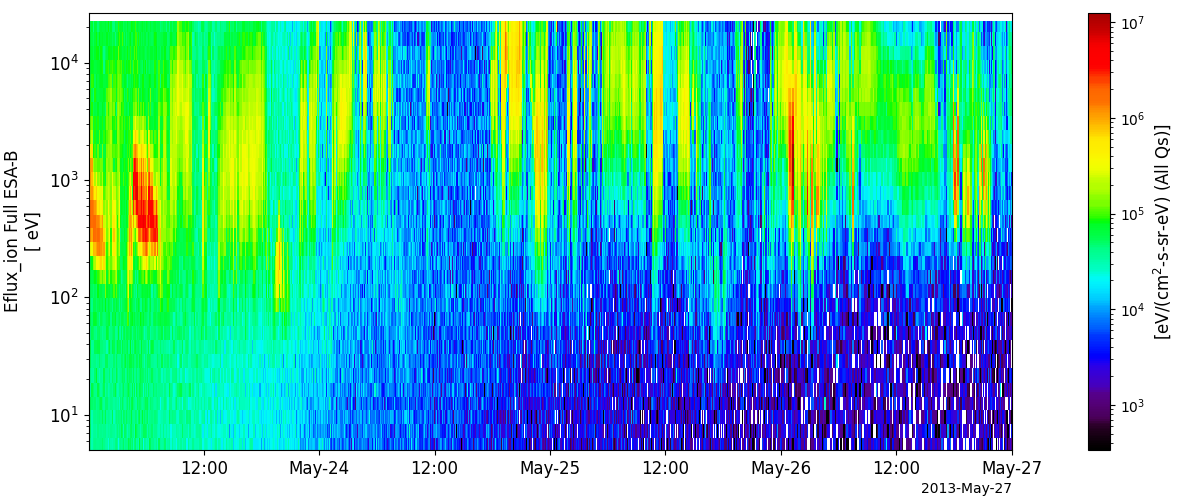

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0077 saved with data from 2013-05-23T07:40:00.000000000 to 2013-05-26T17:30:00.000000000
Last entry time: 2013-06-21 18:35:00, First exit time: 2013-06-24 20:45:00


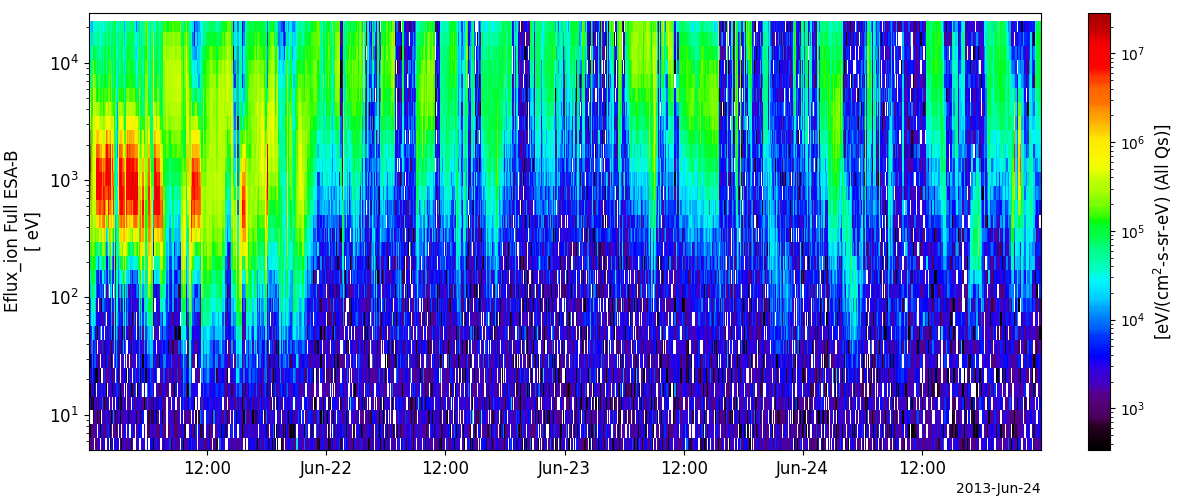

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0078 saved with data from 2013-06-21T18:35:00.000000000 to 2013-06-24T20:45:00.000000000
Last entry time: 2013-07-20 08:20:00, First exit time: 2013-07-24 05:55:00


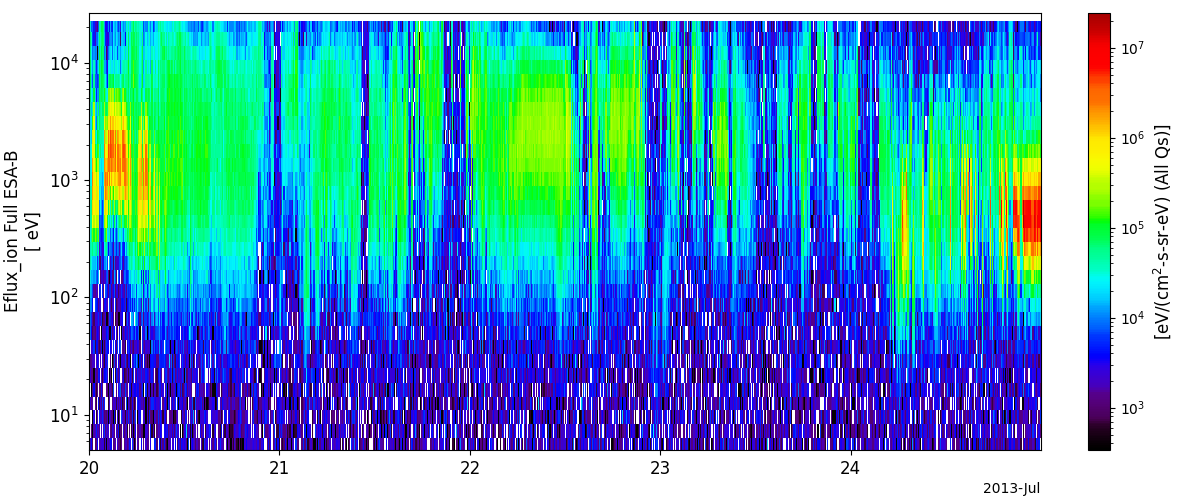

Variable 'B_electric_field_gsm' contains only NaN values and has been removed.
Session session_0079 saved with data from 2013-07-20T08:20:00.000000000 to 2013-07-24T05:55:00.000000000


In [101]:
# Add all magnetotail data to the HDF5 file
for i in range(len(last_entries_times_str)):
    print(f"Last entry time: {last_entries_times_str[i]}, First exit time: {first_exits_times_str[i]}")

    with silence_all():
        curr_data_class = LoadArtemis(start_time = last_entries_times_str[i], 
                                    end_time   = first_exits_times_str[i]
                                    )

    # curr_data_class.plot_pyspedas('B_ion_eflux')

    curr_data_class.convert_min_delta_all(start_time        = last_entries_times_str[i],
                                          end_time          = first_exits_times_str[i],
                                          dt_method         ='max', 
                                          custom_time_delta = 600)

    curr_data_class.extract_to_HDF5('training_data/artemis_P1_v2.h5')

